In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data=pd.read_csv("datasets/Train_v2.csv")
test_data=pd.read_csv("datasets/Test_v2.csv")

In [3]:
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## 2. Data Wrangling

1. Filling missing values
2. Check for duplicates

In [4]:
test_data.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [6]:
train_data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [7]:
test_data.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

## Exploratory Data Analysis 
1. Data Profiling
2. Data Relationships
3. Feature Engineering

In [8]:
all_data = pd.concat([train_data, test_data])

In [9]:
all_data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,NaN,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,NaN,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,NaN,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,NaN,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


<AxesSubplot:xlabel='age_of_respondent', ylabel='count'>

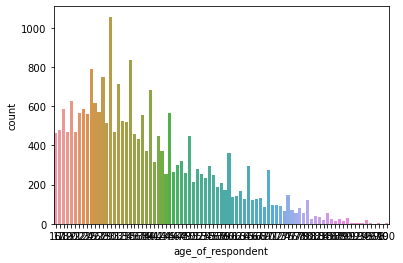

In [10]:
sns.countplot(x="age_of_respondent", data=train_data)

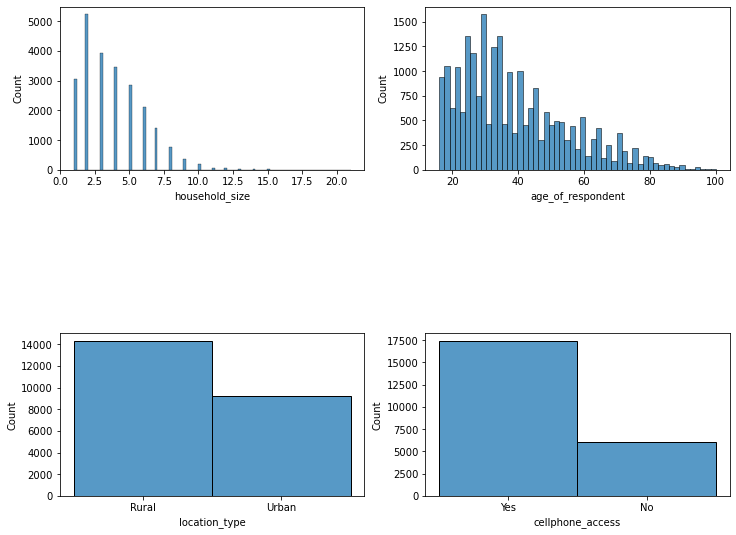

In [11]:
features = ["household_size", "age_of_respondent", "location_type", "cellphone_access"]
fig=plt.subplots(figsize=(12, 9))

for index,feature in enumerate(features):
    plt.subplot(2,2,index+1)
    plt.subplots_adjust(hspace=1.0)
    sns.histplot(x=train_data[feature])
  

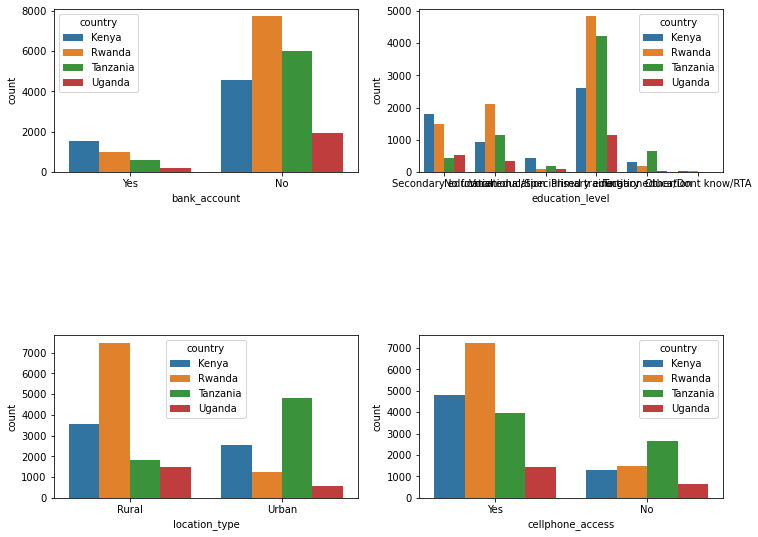

In [12]:
features = ["bank_account", "education_level", "location_type", "cellphone_access"]
fig=plt.subplots(figsize=(12, 9))

for index,feature in enumerate(features):
    plt.subplot(2,2,index+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(data=train_data, x=feature, hue="country")

# Pre-processing and Training Data Development

* Create Dummy or Indicator features for Categorical variables

*   Standardize the magnitude of numeric features

*   Split into testing and training of data sets



In [13]:
all_data.drop(columns="bank_account", inplace=True)

In [14]:
country_dummies_train = pd.get_dummies(train_data["country"])

In [15]:
train_data = train_data.join(country_dummies_train)

In [16]:
country_dummies_test = pd.get_dummies(test_data["country"])
test_data = test_data.join(country_dummies_test)

In [17]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33610 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 33610 non-null  object
 1   year                    33610 non-null  int64 
 2   uniqueid                33610 non-null  object
 3   location_type           33610 non-null  object
 4   cellphone_access        33610 non-null  object
 5   household_size          33610 non-null  int64 
 6   age_of_respondent       33610 non-null  int64 
 7   gender_of_respondent    33610 non-null  object
 8   relationship_with_head  33610 non-null  object
 9   marital_status          33610 non-null  object
 10  education_level         33610 non-null  object
 11  job_type                33610 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.3+ MB


In [18]:
all_data.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [19]:
to_train_data = train_data[["Kenya", "Rwanda", "Tanzania", "Uganda", "age_of_respondent", "household_size"]]

In [20]:
to_test_data = test_data[["Kenya", "Rwanda", "Tanzania", "Uganda", "age_of_respondent", "household_size"]]

In [21]:
to_test_data

,Kenya,Rwanda,Tanzania,Uganda,age_of_respondent,household_size
0,1,0,0,0,30,3
1,1,0,0,0,51,7
2,1,0,0,0,77,3
3,1,0,0,0,39,6
4,1,0,0,0,16,3
...,...,...,...,...,...,...
10081,0,0,0,1,62,2
10082,0,0,0,1,42,8
10083,0,0,0,1,39,1
10084,0,0,0,1,28,6


In [22]:
to_train_data.shape

(23524, 6)

In [23]:
X = to_train_data.values

In [24]:
from sklearn.preprocessing import LabelEncoder

income_encoder=LabelEncoder()
#invoking fit_transform method on object
train_data['bank_account'] = income_encoder.fit_transform(train_data['bank_account'])

train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,Kenya,Rwanda,Tanzania,Uganda
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,1,0,0,0
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,1,0,0,0
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1,0,0,0
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,1,0,0,0
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,1,0,0,0


In [25]:
y = train_data['bank_account']

In [26]:
to_test_data.shape

(10086, 6)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.15)

## Modelling 



*   Fit Models with Training Data set (Hint: RandomForest regressor, SupportVector, XGBoostRegressor)

*   Review Model Outcomes – Iterate over additional models as needed

*   Identify the Final Model



In [28]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB() # Instantiate the object
classifier.fit(X_train, y_train)

GaussianNB()

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
# evaluating performance : Accuracy, Precision, Recall
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy:  0.8515160102011902
Precision:  0.32075471698113206
Recall:  0.06995884773662552
F1 Score:  0.11486486486486487


In [31]:
y_submission = classifier.predict(to_test_data)

In [32]:
y_submission

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
submission_file = pd.read_csv("datasets/SubmissionFile.csv", index_col=None)
submission_file.head()

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,1.0
1,uniqueid_6722 x Kenya,0.0
2,uniqueid_6714 x Kenya,1.0
3,uniqueid_8103 x Kenya,1.0
4,uniqueid_8657 x Kenya,1.0


In [34]:
submission_file["bank_account"] = y_submission

In [35]:
submission_file.to_csv("submission_1.csv", index= False)